![image.png](attachment:image.png)

# Árvores II - Tarefa 3

### 1. Carregar as bases

Vamos utilizar nesta tarefa as bases de reconhecimento de atividade humana através do celular. Carregue novamente as bases salvas na tarefa I.

In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [87]:
X_test = pd.read_csv('X_test.csv', index_col = ['indice', 'indv'])
X_test

,,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
indice,indv,,,,,,,,,,,,,,,,,,,,,
0,1,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,1,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,1,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,1,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,16,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,0.074472,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784
2943,16,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,0.101859,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412
2944,16,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.066249,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184


In [88]:
y_test = pd.read_csv('y_test.csv', index_col= 0)
y_test

,Atividade
0,5_STANDING
1,5_STANDING
2,5_STANDING
3,5_STANDING
4,5_STANDING
...,...
2942,2_WALKING_UPSTAIRS
2943,2_WALKING_UPSTAIRS
2944,2_WALKING_UPSTAIRS
2945,2_WALKING_UPSTAIRS


In [89]:
X_train = pd.read_csv ('X_train.csv', index_col= ['indice', 'indv'])
X_train

,,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
indice,indv,,,,,,,,,,,,,,,,,,,,,
0,1,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,1,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,1,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,1,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,30,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,30,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,30,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811


In [90]:
y_train = pd.read_csv ('y_train.csv', index_col= 0)
y_train

,Atividade
0,5_STANDING
1,5_STANDING
2,5_STANDING
3,5_STANDING
4,5_STANDING
...,...
7347,2_WALKING_UPSTAIRS
7348,2_WALKING_UPSTAIRS
7349,2_WALKING_UPSTAIRS
7350,2_WALKING_UPSTAIRS


### 2. Calcule os ```ccp_alphas```.

Vamos seguir uma lógica bem em linha com o que já estamso acostumados, com as seguintes orientações:

- Utilizar treinamento e teste conforme já vieram definidos originalmente
- Por pragmatismo, utilizar ```min_samples_leaf=20```
- Utilize as mesmas "3 melhores variáveis" identificadas no exercício anterior.

In [91]:
%%time
cols = ['tGravityAcc-min()-X', 'fBodyAcc-mad()-X', 'tGravityAcc-mean()-Y']

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs


In [92]:
X_train = X_train[cols]
X_test = X_test[cols]

print('X_train:', X_train.shape)
print('y_train:', y_train.shape)

print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (7352, 3)
y_train: (7352, 1)
X_test: (2947, 3)
y_test: (2947, 1)


In [93]:
clf = DecisionTreeClassifier(min_samples_leaf=20,
                             random_state=42)
path = clf.cost_complexity_pruning_path(X=X_train,
                                        y=y_train)

ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas = np.unique(ccp_alphas[ccp_alphas >= 0])

print('Quantidade de ccp_alphas:', ccp_alphas.size)

Quantidade de ccp_alphas: 108


### 3. *Grid Search*

Vou deixar especificações iniciais mínimas, que visam limitar o tempo de máquina, pois um procedimento desses pode demorar muito tempo dependendo da especificação. Mas conforme você for ficando confortável com o tempo consumido pelo procedimento, pode fazer um algoritmo mais exaustivo, por exemplo, avaliando mais valores de ```ccp_alpha```.

- Meça o tempo
- Utilize a base de treinamento
- Utilize um *cross validation* do tipo *k-fold*, especifique k=10
- Você pode ler 1 a cada ```k``` valores para uma melhor varredura utilizando, por exemplo, ```ccp_alpha[::10]```
- Não se esqueça de limitar o número de variáveis

In [94]:
%%time

clf = DecisionTreeClassifier(random_state= 42)

CPU times: user 18 µs, sys: 0 ns, total: 18 µs
Wall time: 20.7 µs


In [95]:
grid_parametros = {'ccp_alpha': ccp_alphas[::10]}

grid = GridSearchCV(estimator= clf,
                    param_grid= grid_parametros,
                    cv= 10,
                    verbose=1)
grid.fit(X_train, y_train)

resultados = pd.DataFrame(grid.cv_results_)
resultados.sort_values(by='rank_test_score')

Fitting 10 folds for each of 11 candidates, totalling 110 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
10,0.034065,0.000391,0.004606,0.000203,0.007078,{'ccp_alpha': 0.0070780153685231426},0.815217,0.868207,0.872109,0.783673,0.817687,0.800000,0.835374,0.783673,0.870748,0.733333,0.818002,0.042883,1
9,0.034679,0.000619,0.004609,0.000076,0.002185,{'ccp_alpha': 0.0021848127801104567},0.832880,0.819293,0.873469,0.771429,0.733333,0.753741,0.824490,0.717007,0.869388,0.779592,0.797462,0.051871,2
0,0.050316,0.002014,0.007643,0.000863,0.000000,{'ccp_alpha': 0.0},0.830163,0.763587,0.831293,0.697959,0.759184,0.765986,0.824490,0.816327,0.825850,0.761905,0.787674,0.042328,3
1,0.049543,0.002530,0.008046,0.001319,0.000010,{'ccp_alpha': 1.043854543614182e-05},0.830163,0.763587,0.831293,0.697959,0.759184,0.765986,0.824490,0.816327,0.825850,0.761905,0.787674,0.042328,3
2,0.050163,0.001340,0.007133,0.000120,0.000040,{'ccp_alpha': 3.958987221204372e-05},0.830163,0.763587,0.831293,0.697959,0.759184,0.765986,0.824490,0.816327,0.825850,0.761905,0.787674,0.042328,3
3,0.049947,0.001392,0.007396,0.000365,0.000095,{'ccp_alpha': 9.476270433879971e-05},0.830163,0.763587,0.831293,0.697959,0.759184,0.765986,0.824490,0.816327,0.825850,0.761905,0.787674,0.042328,3
4,0.041354,0.007803,0.005884,0.001496,0.000229,{'ccp_alpha': 0.00022878203135276082},0.835598,0.750000,0.835374,0.697959,0.763265,0.752381,0.839456,0.810884,0.824490,0.764626,0.787403,0.045812,7
5,0.033918,0.000386,0.004596,0.000200,0.000376,{'ccp_alpha': 0.00037627435359345075},0.804348,0.760870,0.844898,0.691156,0.751020,0.746939,0.832653,0.808163,0.839456,0.779592,0.785909,0.046635,8
8,0.035266,0.002898,0.004823,0.000430,0.001200,{'ccp_alpha': 0.0012000237543503187},0.778533,0.755435,0.821769,0.731973,0.742857,0.768707,0.835374,0.706122,0.851701,0.795918,0.778839,0.044798,9
6,0.035277,0.001556,0.004877,0.000671,0.000489,{'ccp_alpha': 0.0004893467050404673},0.760870,0.771739,0.819048,0.689796,0.755102,0.751020,0.810884,0.805442,0.834014,0.775510,0.777343,0.040029,10


In [96]:
melhor_ccp= resultados.iloc[grid.best_index_]['param_ccp_alpha']

print('\n mean_test_score:', grid.best_score_)
print('\n param_ccp_alpha:', melhor_ccp)


 mean_test_score: 0.818002255249926

 param_ccp_alpha: 0.0070780153685231426


### 4. Avaliando a árvore

- Obtenha a árvore na melhor configuração treinada em toda a base de treino
- Calcule a acurácia dessa árvore na base de testes
- Visualize a matriz de confusão

In [97]:
%%time

clf = DecisionTreeClassifier(random_state=42,
                             ccp_alpha=melhor_ccp
                            ).fit(X_train, y_train)
print(pd.DataFrame(data=clf.get_params(),
                   index=pd.Index(data=['Valor'],
                                  name='Parâmetro')
                  ).T,
      '\n')

print('Acurácia da árvore na base de testes:',
      clf.score(X=X_test, y=y_test))

Parâmetro                    Valor
ccp_alpha                 0.007078
class_weight                  None
criterion                     gini
max_depth                     None
max_features                  None
max_leaf_nodes                None
min_impurity_decrease          0.0
min_samples_leaf                 1
min_samples_split                2
min_weight_fraction_leaf       0.0
monotonic_cst                 None
random_state                    42
splitter                      best 

Acurácia da árvore na base de testes: 0.7380386834068544
CPU times: user 53.9 ms, sys: 986 µs, total: 54.9 ms
Wall time: 54.6 ms


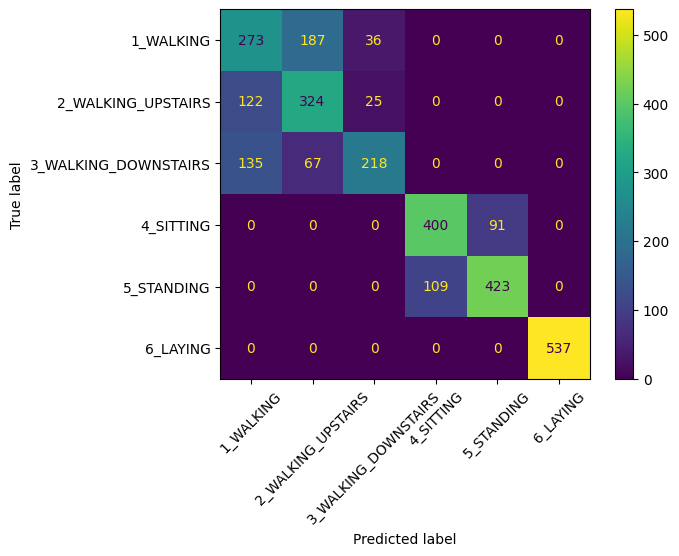

In [98]:
ConfusionMatrixDisplay.from_estimator(estimator= clf,
                                      X=X_test,
                                      y=y_test)

plt.tick_params(axis='x', rotation= 45)
plt.show()

### 5. Melhorando a árvore

A melhor forma de se melhorar um algoritmo é colocando nele novas variáveis que agreguem valor. Podemos usar a força-bruta e ir colocando variáveis aleatoriamente - ou colocar todas e deixar rodando por um bom tempo - ou utilizar uma lógica eficiente e fazer uma seleção de variáveis.

- Observe que há classes mais fáceis e mais difíceis de se identificar
- Crie uma variável binária para uma das classes de maior erro
- Fala uma árvore de classificação bem simples para esta variável:
    - utilize ```mean_samples_leaf=20```
    - utilize ```max_depth=4```
    - coloque todas as variáveis
- Observe a importância das variáveis, e selecione as 3 com maior importância
- Rode novamente o algoritmo acima com as 3 novas variáveis e avalie a acurácia

In [99]:
%%time

matriz = confusion_matrix(y_true=y_test,
                          y_pred=clf.predict(X_test))

acertos = [matriz[x,x] for x in range(6)]
erros   = sum(matriz) - acertos

pd.DataFrame(data={'acertos':acertos,
                   'erros':erros},
             index=pd.Index(data=list(range(1,7)),
                            name='classe')
            ).sort_values(by='erros',
                          ascending=False)

CPU times: user 23.9 ms, sys: 0 ns, total: 23.9 ms
Wall time: 28.3 ms


,acertos,erros
classe,,
1,273,257
2,324,254
4,400,109
5,423,91
3,218,61
6,537,0


In [100]:
print(y_train.value_counts().sort_index())

Atividade           
1_WALKING               1226
2_WALKING_UPSTAIRS      1073
3_WALKING_DOWNSTAIRS     986
4_SITTING               1286
5_STANDING              1374
6_LAYING                1407
Name: count, dtype: int64


In [101]:
%%time

clf_2 = DecisionTreeClassifier(min_samples_leaf=20,
                               max_depth=4,
                               random_state=42).fit(X=X_train,
                                                    y=y_train_2)

melhores_classe2 = (pd.DataFrame(data={'var': X_train.columns,
                                       'feature_importances_': clf_2.feature_importances_})
                      .sort_values(by='feature_importances_',
                                   ascending=False))
cols_classe2 = melhores_classe2['var'].values[:3]
print('3 melhores variáveis:', cols_classe2, '\n')

cols_2 = cols + cols_classe2.tolist()
X_train = X_train[cols_2]
X_test = X_test[cols_2]

3 melhores variáveis: ['tGravityAcc-min()-X' 'fBodyAcc-mad()-X' 'tGravityAcc-mean()-Y'] 

CPU times: user 7.9 ms, sys: 0 ns, total: 7.9 ms
Wall time: 9.19 ms


In [102]:
%%time

clf_2 = DecisionTreeClassifier(random_state=42)
path_2 = clf_2.cost_complexity_pruning_path(X=X_train,
                                            y=y_train)
ccp_alphas_2, impurities_2 = path_2.ccp_alphas, path_2.impurities
ccp_alphas_2 = np.unique(ccp_alphas_2[ccp_alphas_2 >= 0])

clf_2 = DecisionTreeClassifier(random_state=42)
grid_2 = GridSearchCV(estimator=clf_2,
                      param_grid={'ccp_alpha': ccp_alphas_2[::10]},
                      cv=10,
                      verbose=1)
grid_2.fit(X_train, y_train)

resultados_2 = pd.DataFrame(grid_2.cv_results_)
resultados_2.sort_values(by='rank_test_score').head()

Fitting 10 folds for each of 27 candidates, totalling 270 fits
CPU times: user 18.8 s, sys: 13.4 ms, total: 18.8 s
Wall time: 18.9 s


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
25,0.084287,0.004082,0.006878,0.000473,0.003672,{'ccp_alpha': 0.0036719336322534046},0.815217,0.864130,0.823129,0.790476,0.767347,0.753741,0.850340,0.785034,0.870748,0.714286,0.803445,0.048133,1
13,0.057068,0.001054,0.004845,0.000289,0.000265,{'ccp_alpha': 0.0002652339499455931},0.831522,0.756793,0.836735,0.693878,0.765986,0.753741,0.839456,0.804082,0.820408,0.780952,0.788355,0.044458,2
6,0.082523,0.002253,0.006794,0.000176,0.000162,{'ccp_alpha': 0.00016226638413225662},0.831522,0.760870,0.839456,0.695238,0.752381,0.767347,0.836735,0.806803,0.817687,0.765986,0.787402,0.044350,3
9,0.062359,0.008419,0.005016,0.000857,0.000208,{'ccp_alpha': 0.00020802662740830819},0.834239,0.760870,0.842177,0.696599,0.751020,0.751020,0.839456,0.808163,0.819048,0.767347,0.786994,0.046188,4
10,0.057137,0.002019,0.004654,0.000051,0.000224,{'ccp_alpha': 0.00022382352120558612},0.831522,0.760870,0.842177,0.695238,0.757823,0.749660,0.840816,0.808163,0.819048,0.763265,0.786858,0.046162,5


In [103]:
melhor_ccp_2 = grid_2.best_params_['ccp_alpha']

print('\n mean_test_score:', grid_2.best_score_)
print('\n param_ccp_alpha:', melhor_ccp_2)


 mean_test_score: 0.8034449866903284

 param_ccp_alpha: 0.0036719336322534046


In [104]:
%%time

clf_2 = DecisionTreeClassifier(random_state=42,
                               ccp_alpha=melhor_ccp_2
                              ).fit(X_train, y_train)
print(pd.DataFrame(data=clf_2.get_params(),
                   index=pd.Index(data=['Valor'],
                                  name='Parâmetro')
                  ).T,
      '\n')

print('Acurácia da árvore na base de testes:',
      clf_2.score(X=X_test, y=y_test))

Parâmetro                    Valor
ccp_alpha                 0.003672
class_weight                  None
criterion                     gini
max_depth                     None
max_features                  None
max_leaf_nodes                None
min_impurity_decrease          0.0
min_samples_leaf                 1
min_samples_split                2
min_weight_fraction_leaf       0.0
monotonic_cst                 None
random_state                    42
splitter                      best 

Acurácia da árvore na base de testes: 0.7129284017645062
CPU times: user 90 ms, sys: 0 ns, total: 90 ms
Wall time: 90.3 ms


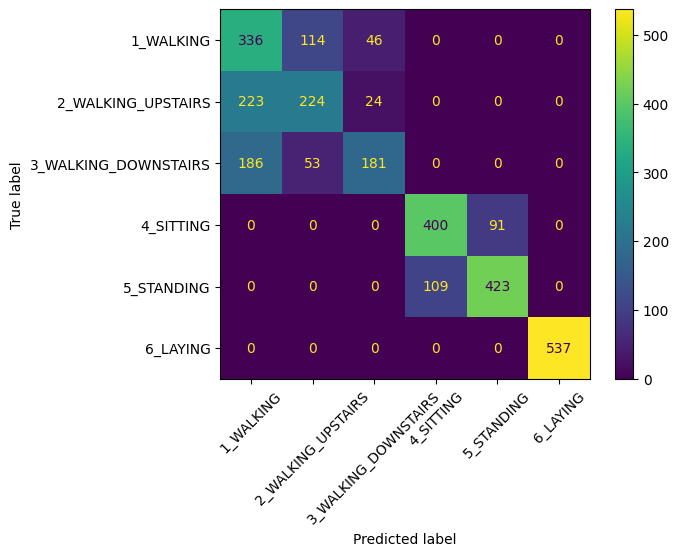

In [105]:
ConfusionMatrixDisplay.from_estimator(estimator=clf_2,
                                      X=X_test,
                                      y=y_test)

plt.tick_params(axis='x', rotation= 45)
plt.show()